In [2]:
import pandas as pd
import numpy as np
import mglearn
import graphviz
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [4]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [8]:
len(x_train), len(y_train), len(x_test), len(y_test)

(426, 426, 143, 143)

In [9]:
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train, y_train)

MLPClassifier(random_state=0)

In [10]:
print(mlp.score(x_test, y_test))
print(mlp.score(x_train, y_train))

0.9300699300699301
0.9272300469483568


### 정확도 높일 수 있는 방법
    평균 0, 분산 1을 가지도록 data를 변형해주면 성능이 좋아질 수 있다 -> standardscaler 사용 

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
x_train_scalered = scaler.fit_transform(x_train)
x_test_scalered = scaler.transform(x_test)   # x_train을 학습하고 변환했기 때문에 두 번 학습하지 않도록 transform만 사용

In [13]:
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train_scalered, y_train)  # 변환해준 x_train data 사용

c:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

### max_iter 값 늘려주라는 경고
    Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

In [16]:
print(mlp.score(x_test_scalered, y_test))
print(mlp.score(x_train_scalered, y_train))

0.965034965034965
0.9906103286384976


In [19]:
mlp = MLPClassifier(max_iter=1000, random_state=0, alpha=1) # alpha => 과대적합 규제
mlp.fit(x_train_scalered, y_train)

MLPClassifier(alpha=1, max_iter=1000, random_state=0)

In [20]:
print(mlp.score(x_test_scalered, y_test))
print(mlp.score(x_train_scalered, y_train))

0.972027972027972
0.9882629107981221


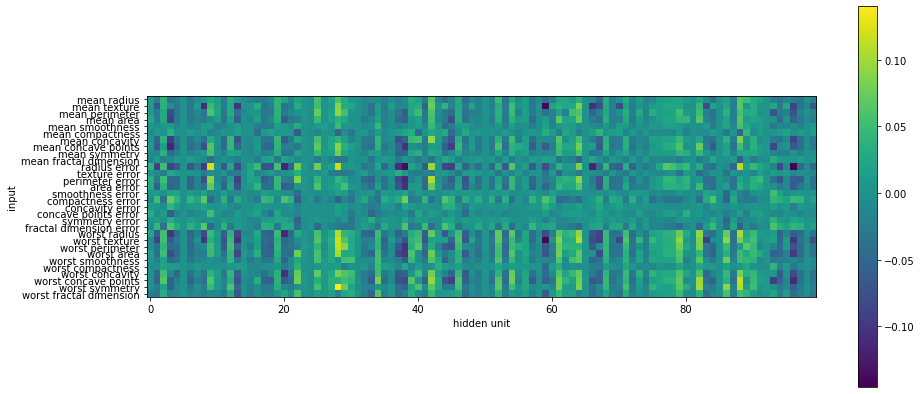

In [23]:
plt.figure(figsize=(15,7))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')  # 가중치
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('hidden unit')   # x축은 hidden_layer_size가 기본값 100이기 때문에 범위가 100임
plt.ylabel('input')
plt.colorbar()
# 색이 밝을수록 중요도가 높다
# 0에 가까우면 학습에 영향을 많이 안받는다라고 해석